# k 近傍法による分類
k Nearest Neighbor

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
DATADIR = '../../data/MNIST/raw/'

trainimg_path = DATADIR + 'train-images-idx3-ubyte'
trainlabel_path = DATADIR + 'train-labels-idx1-ubyte'
testimg_path = DATADIR + 't10k-images-idx3-ubyte'
testlabel_path = DATADIR + 't10k-labels-idx1-ubyte'

In [3]:
def load_img(path):
    with open(path, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, 28**2)
    return data

def load_label(path):
    with open(path, 'rb') as f:
        label = np.frombuffer(f.read(), np.uint8, offset=8)
    return label

In [4]:
trainimgs = load_img(trainimg_path)
trainlabels = load_label(trainlabel_path)
testimgs = load_img(testimg_path)
testlabels = load_label(testlabel_path)

param 1 is completed: score 0.9691
param 3 is completed: score 0.9705
param 5 is completed: score 0.9688
param 10 is completed: score 0.9665
param 20 is completed: score 0.9625
param 50 is completed: score 0.9534
param 100 is completed: score 0.944
param 300 is completed: score 0.9179
param 500 is completed: score 0.9039
param 1000 is completed: score 0.8731
param 10000 is completed: score 0.6494


,0,1,2,3,4,5,6,7,8,9,10
0,1.0000,3.0000,5.0000,10.0000,20.0000,50.0000,100.000,300.0000,500.0000,1000.0000,10000.0000
1,0.9691,0.9705,0.9688,0.9665,0.9625,0.9534,0.944,0.9179,0.9039,0.8731,0.6494


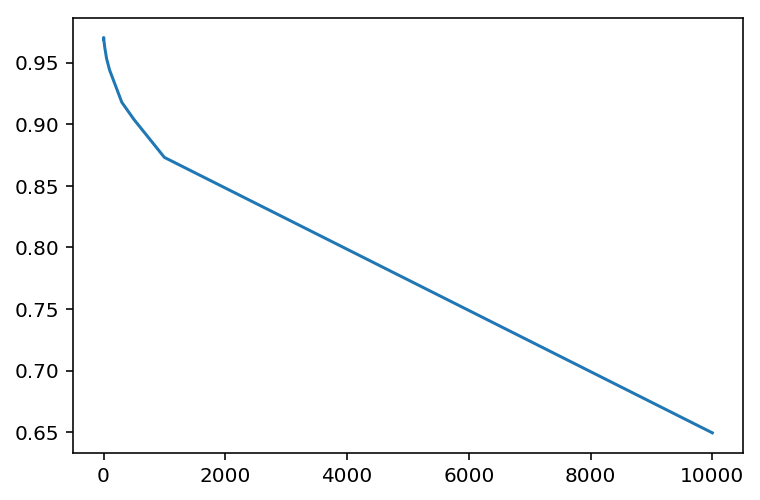

Wall time: 2h 47min 45s


In [5]:
%%time
from sklearn.neighbors import KNeighborsClassifier

params = [1, 3, 5, 10, 20, 50, 100, 300, 500, 1000, 10000]
score = list()
for p in params:
    neigh = KNeighborsClassifier(n_neighbors=p)
    neigh.fit(trainimgs, trainlabels)
    prob = neigh.score(testimgs, testlabels)
    score.append(prob)
    print(f'param {p} is completed: score {prob}')

display(pd.DataFrame([params, score]))
plt.plot(params, score)
plt.show()